# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [103]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = "/Users/joeboardman/Documents/Springboard/Guided Capstone"
print(path)


/Users/joeboardman/Documents/Springboard/Guided Capstone


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [104]:
data_path = os.path.join(path, 'data')
os.chdir(data_path)
df = pd.read_csv('step3_output.csv')
df = df.drop('Unnamed: 0', axis=1)
print(df.head())
df.info()

                            Name       state  summit_elev  vertical_drop  \
0               Hilltop Ski Area      Alaska         2090            294   
1            Sunrise Park Resort     Arizona        11100           1800   
2  Yosemite Ski & Snowboard Area  California         7800            600   
3         Boreal Mountain Resort  California         7700            500   
4                    Dodge Ridge  California         8200           1600   

   trams  fastEight  fastSixes  fastQuads  quad  triple  ...  \
0      0        0.0          0          0     0       1  ...   
1      0        0.0          0          1     2       3  ...   
2      0        0.0          0          0     0       1  ...   
3      0        0.0          0          1     1       3  ...   
4      0        0.0          0          0     1       2  ...   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0               30.0            30.0        150.000000       36.0   
1              800.0

In [105]:
dfo = pd.DataFrame(df['state'])
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df


,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
3,Boreal Mountain Resort,7700,500,0,0.0,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Dodge Ridge,8200,1600,0,0.0,0,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Hogadon Basin,8000,640,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
172,Sleeping Giant Ski Resort,7428,810,0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
173,Snow King Resort,7808,1571,0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
174,Snowy Range Ski & Recreation Area,9663,990,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,1


In [106]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name', 'AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

In [107]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [108]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)

In [109]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)
y_pred = np.delete(y_pred, 36)
y_test = np.delete(y_test, 36)
print(y_pred)
print(y_test)

[50.8668006  57.38649673 47.80372445 44.11404502 58.72734687 47.80310796
 55.26066356 84.05643391 37.132899   45.20330684 77.77192651 81.17545728
 46.95584184 61.89840823 58.88509653 42.43099196 44.10711629 33.11677065
 37.2699466  37.18977316 48.80014979 49.04856651 61.49773419 54.88251608
 35.61844897 70.5971099  59.2926681  31.59391224 60.13817512 63.50665178
 52.04139445 81.20937762 90.48657241 68.63353975 56.85734143 77.31432793
 79.05955721 61.85292975 48.61576989 52.67657296 34.61111315 66.71845701
 32.68502312]
[47.         62.         65.         48.         64.16681004 45.
 59.         89.         49.         54.         79.         78.
 40.         75.         68.         43.         75.         39.
 39.         35.         49.         50.         60.         48.
 49.         72.         64.16681004 43.         56.         59.
 47.         72.         79.         75.         59.         77.
 73.         49.         47.         49.         35.         63.2
 55.        ]


In [110]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(('explained variance score = ' + str(abs(evs))), ('mean absolute error = ' + str(mae)))
print(abs(model.intercept_))

explained variance score = 0.6102248082082719 mean absolute error = 6.4237579355293
56.289248242086586


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [111]:
X2 = df[df['Name'].str.contains('Snow King')]
X2

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
173,Snow King Resort,7808,1571,0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [112]:
# Prepare the row for model fitting
X2 = df.drop(['Name', 'AdultWeekend'], axis=1)
scaler = preprocessing.StandardScaler().fit(X2)
X2_scaled=scaler.transform(X2) 

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [113]:
#run model to predict price for mountain - used snow king because big mtn is not in dataset - question
y_pred2 = model.predict(X2_scaled)
print(y_pred2[173])

61.077785591004265


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [114]:
price = df.loc[173, 'AdultWeekend']
print(price)

59.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

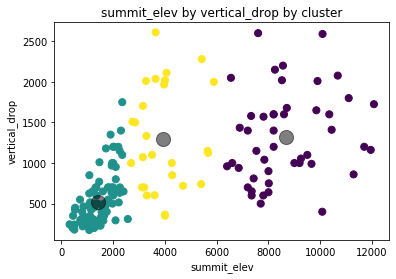

In [115]:
fig_path = os.path.join(path, 'figures')

from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X2.values)
centers = kmeans3.cluster_centers_

#create scatter plot with summit elev and vertical drop based on the clusters and the center of the clusters
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig(fig_path + '/fig1.png',bbox_inches='tight')

In [ ]:


plt.savefig(fig_path + '/fig2.png',bbox_inches='tight')

In [0]:


plt.savefig(fig_path + '/fig2.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [0]:
model_path = os.path.join(path, 'models')
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, model_path + '/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [96]:
performance = {'Model 1':
               {'explained variance score':0.6102248082082719, 'mean absolute error':6.4237579355293, 'intercept':56.289248242086586},
              'Model 2':
              {'explained variance score':0.5103365877427363, 'mean absolute error':7.654697513288412, 'intercept':56.478041451118976},
              'Model 3':
              {'explained variance score':0.5143734307944894, 'mean absolute error':7.653058090240757, 'intercept':56.5066619637435}}

df_perf = pd.DataFrame(performance)

df_perf

,Model 1,Model 2,Model 3
explained variance score,0.610225,0.510337,0.514373
mean absolute error,6.423758,7.654698,7.653058
intercept,56.289248,56.478041,56.506662


In [97]:
save = os.path.join(path, 'Model_perf.csv')
df_perf.to_csv(save)